<a href="https://colab.research.google.com/github/catawba-data-mining/CIS-3902-Data-Mining/blob/main/ChallengeLabDataViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge Exercise
## Your Name(s)

### Using the Boston Building and Property Violations Dataset showing a variety of code violations, perform exploratory data analysis and document what you learn.
### To learn more about the metadata visit: <a href="https://data.boston.gov/dataset/building-and-property-violations1/resource/800a2663-1d6a-46e7-9356-bedb70f5332c">Boston Building and Property Violations</a><br>

In [81]:
# import statements
import pandas as pd
import seaborn as sns


In [55]:
# create a variable to store the url for the data ingest
urltodata = "https://data.boston.gov/dataset/705244a6-70a6-4ff8-ab8e-56441aff18e7/resource/800a2663-1d6a-46e7-9356-bedb70f5332c/download/tmpfbdp9ex7.csv"

In [56]:
# read the data using the url into a pandas dataframe
bostondata = pd.read_csv(urltodata)

In [57]:
# examine the first few rows of data
bostondata.head()

,ticket_no,status_dttm,status,code,value,description,stno,sthigh,street,suffix,city,state,zip,sam_id,latitude,longitude,location
0,V596913,2022-01-28 15:07:06,Open,104.6,NaN,Right of Entry,84,NaN,Margin,ST,Boston,MA,02113,89730,42.365620,-71.057010,"(42.36562000046461, -71.05701000149027)"
1,V596873,2022-01-28 09:44:57,Open,102.8,NaN,Maintenance,83,89,Devonshire,ST,Boston,MA,02108,340709,42.357710,-71.057506,"(42.35771003985634, -71.05750633948047)"
2,V596801,2022-01-27 11:55:50,Open,116,NaN,Unsafe Structures,750,,Harrison,AVE,Roxbury,MA,02118,166046,42.336882,-71.072005,"(42.33688186685794, -71.0720048429599)"
3,V596606,2022-01-26 08:58:51,Open,102.8,NaN,Maintenance,8,NaN,Faunce,RD,Mattapan,MA,02126,56744,42.271040,-71.091310,"(42.271039999637345, -71.09131000165604)"
4,V596381,2022-01-24 11:24:34,Open,3307.1,NaN,Protection of Adj. Property,579,NaN,Bennington,ST,East Boston,MA,02128,14800,42.382608,-71.017793,"(42.38260800024299, -71.01779300134898)"


### Complete the notebook by adding:
1) information on nulls in data<br>
2) statistical information on relevant columns<br>
3) three different visualizations using seaborn<br>
4) final markdown explaining what you have learned about the dataset from the statistical analysis and visualizations<br>

NOTE:  you can add additional code and markdown blocks


In [58]:
#1 information on nulls
bostondata.isna().sum()

ticket_no          0
status_dttm        0
status             0
code               0
value          20449
description      221
stno               0
sthigh         15798
street             0
suffix           151
city               1
state              0
zip                7
sam_id             0
latitude           0
longitude          0
location           0
dtype: int64

In [65]:
#lets add a column - month - and make it numeric
# we will use slice
bostondata['month'] = bostondata['status_dttm'].str.slice(5,7)
#one of the values is not null, but has spaces
bostondata["month"].replace({"": "09"}, inplace=True)
# change the column type from object to int
bostondata['month'] = pd.to_numeric(bostondata['month'])
#lets see info on bostondata
bostondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20449 entries, 0 to 20448
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ticket_no    20449 non-null  object 
 1   status_dttm  20449 non-null  object 
 2   status       20449 non-null  object 
 3   code         20449 non-null  object 
 4   value        0 non-null      float64
 5   description  20228 non-null  object 
 6   stno         20449 non-null  object 
 7   sthigh       4651 non-null   object 
 8   street       20449 non-null  object 
 9   suffix       20298 non-null  object 
 10  city         20448 non-null  object 
 11  state        20449 non-null  object 
 12  zip          20442 non-null  object 
 13  sam_id       20449 non-null  int64  
 14  latitude     20449 non-null  float64
 15  longitude    20449 non-null  float64
 16  location     20449 non-null  object 
 17  month        20449 non-null  int64  
dtypes: float64(3), int64(2), object(13)
memory usa

In [66]:
# lets get the value counts for our new column
bostondata['month'].value_counts()

9     2387
3     2030
12    1887
10    1769
1     1731
6     1612
7     1604
2     1567
4     1499
8     1497
11    1453
5     1413
Name: month, dtype: int64

In [67]:
#2 statistical information - the numerical data does not have relevant business meaning although lat and long do show an average location
bostondata.describe()


,value,sam_id,latitude,longitude,month
count,0.0,20449.000000,20449.000000,20449.000000,20449.000000
mean,NaN,129811.121473,42.321722,-71.081802,6.586728
std,NaN,94120.102517,0.033608,0.032566,3.486942
min,NaN,22.000000,42.232100,-71.181830,1.000000
25%,NaN,59036.000000,42.295630,-71.096940,3.000000
50%,NaN,111082.000000,42.319550,-71.077960,7.000000
75%,NaN,167424.000000,42.349760,-71.060968,9.000000
max,NaN,441876.000000,42.392962,-70.997140,12.000000


In [73]:
#2 statistical information
#lets see the counts of the categories in certain columns
#we will start with description
bostondata.description.value_counts()


Unsafe and Dangerous                                                                                                                                                                                                                    3400
Failure to Obtain Permit                                                                                                                                                                                                                3192
Owners Responsibility to Maintain Structural Elements - Structural elements  shall be maintained free from holes, cracks, loose plaster, or other defects.                                                                              1451
Maintenance                                                                                                                                                                                                                             1002
Owners Installation/Maintenance Responsibility - All

In [74]:
#2 statistical information
# we can see the percentages
bostondata.description.value_counts(normalize=True)
#top six are of interest

Unsafe and Dangerous                                                                                                                                                                                                                    0.168084
Failure to Obtain Permit                                                                                                                                                                                                                0.157801
Owners Responsibility to Maintain Structural Elements - Structural elements  shall be maintained free from holes, cracks, loose plaster, or other defects.                                                                              0.071732
Maintenance                                                                                                                                                                                                                             0.049535
Owners Installation/Maintenance Resp

In [94]:
#bostondata_filtered = bostondata.query("description == 'Unsafe and Dangerous' |  description == 'Maintenance' | description = 'Failure to Obtain Permit'")
bostondata_filtered = bostondata[(bostondata.description == 'Unsafe and Dangerous') | (bostondata.description == 'Maintenance') | (bostondata.description == 'Failure to Obtain Permit')]

In [95]:
bostondata_filtered.info()
#we are down to 7594 entries and can now learn more about this one category

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7594 entries, 1 to 20448
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ticket_no    7594 non-null   object 
 1   status_dttm  7594 non-null   object 
 2   status       7594 non-null   object 
 3   code         7594 non-null   object 
 4   value        0 non-null      float64
 5   description  7594 non-null   object 
 6   stno         7594 non-null   object 
 7   sthigh       2100 non-null   object 
 8   street       7594 non-null   object 
 9   suffix       7557 non-null   object 
 10  city         7594 non-null   object 
 11  state        7594 non-null   object 
 12  zip          7592 non-null   object 
 13  sam_id       7594 non-null   int64  
 14  latitude     7594 non-null   float64
 15  longitude    7594 non-null   float64
 16  location     7594 non-null   object 
 17  month        7594 non-null   int64  
dtypes: float64(3), int64(2), object(13)
memory usag

In [96]:
#3 seaborn viz 1
# value counts can be useful
#lets look at the value counts by city and street
bostondata_filtered.groupby(["city", "street"])["description"].value_counts().unstack("description").fillna(0)

description            Failure to Obtain Permit  ...  Unsafe and Dangerous
city         street                              ...                      
Allston      Adamson                        1.0  ...                   2.0
             Alcott                         1.0  ...                   1.0
             Aldie                          1.0  ...                   1.0
             Allston                        5.0  ...                   0.0
             Appian                         1.0  ...                   0.0
...                                         ...  ...                   ...
West Roxbury Woodley                        0.0  ...                   0.0
             Worley                         1.0  ...                   0.0
             Wren                           0.0  ...                   1.0
             Wycliff                        1.0  ...                   0.0
             Yorktown                       1.0  ...                   0.0

[1712 rows x 3 columns]

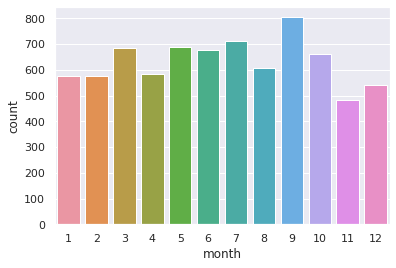

In [97]:
#4 seaborn viz 2
# count plots are good for visualizatioin of categorical data
sns.set_theme(style="darkgrid")
viz2 = sns.countplot(x="month", data=bostondata_filtered)

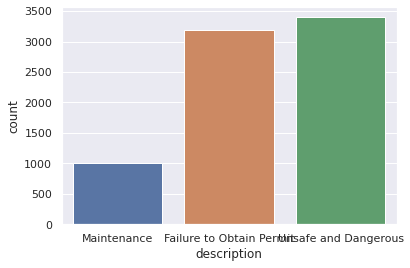

In [98]:
#4 seaborn viz 3
# count plots are good for visualizatioin of categorical data
sns.set_theme(style="darkgrid")
viz2 = sns.countplot(x="description", data=bostondata_filtered)

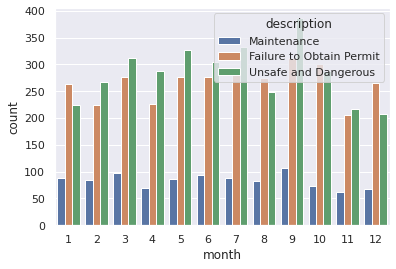

In [99]:
#5 seaborn viz 4
viz3 = sns.countplot(x="month", hue="description", data=bostondata_filtered)

### What has been learned from Exploratory Data Analysis
